# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
df = pd.read_csv("./hasil_clustering.csv")
df.head()

,Category,Product,Cluster,Total_Price_Bin,Price_Bin,Quantity_Bin
0,Water,Vittel,2,Very Low,Budget,Low
1,Water,Vio Wasser,2,Low,Budget,Medium
2,Alcoholic Beverages,Kölsch,3,Low,Budget,Low
3,Water,Evian,2,High,Budget,High
4,Water,Volvic,2,Very Low,Budget,Low


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Pisahkan features (X) dan target (y)
X = df.drop(['Cluster','Product'], axis=1)  # Hapus kolom yang tidak diperlukan
y = df['Cluster']  # Misalnya ingin memprediksi Category

# Lakukan train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% untuk test set
    random_state=42    # untuk reproduksibilitas
)

# Cek ukuran dataset
print("Ukuran training set:", X_train.shape)
print("Ukuran testing set:", X_test.shape)

Ukuran training set: (6400, 4)
Ukuran testing set: (1600, 4)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Definisikan urutan kategori
total_price_bin_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
price_bin_order = ['Budget', 'Economy', 'Standard', 'Premium', 'Luxury']
quantity_bin_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

price_encoder = OrdinalEncoder(categories=[total_price_bin_order])
X['Total_Price_Bin_Encoded'] = price_encoder.fit_transform(X[['Total_Price_Bin']])

# Ordinal Encoder untuk Price_Bin
price_encoder = OrdinalEncoder(categories=[price_bin_order])
X['Price_Bin_Encoded'] = price_encoder.fit_transform(X[['Price_Bin']])

# Ordinal Encoder untuk Quantity_Bin
quantity_encoder = OrdinalEncoder(categories=[quantity_bin_order])
X['Quantity_Bin_Encoded'] = quantity_encoder.fit_transform(X[['Quantity_Bin']])

# Hapus kolom kategorik asli
X = X.drop(['Total_Price_Bin','Price_Bin', 'Quantity_Bin'], axis=1)

In [5]:
X.head()

,Category,Total_Price_Bin_Encoded,Price_Bin_Encoded,Quantity_Bin_Encoded
0,Water,0.0,0.0,1.0
1,Water,1.0,0.0,2.0
2,Alcoholic Beverages,1.0,0.0,1.0
3,Water,3.0,0.0,3.0
4,Water,0.0,0.0,1.0


In [14]:
categorical_features = ['Category']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(
    encoded_categorical, 
    columns=encoder.get_feature_names_out(categorical_features)
)
features = [col for col in X.columns if col not in categorical_features]
X = pd.concat([
    encoded_df, 
    X[features]
], axis=1)

In [15]:
X.head()

,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Total_Price_Bin_Encoded,Price_Bin_Encoded,Quantity_Bin_Encoded
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,2.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,3.0,0.0,3.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
# Split data
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling fitur numerik (opsional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Random Forest atau SVM
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi Model
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)

# Akurasi
print("Akurasi Model:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFitur Importance:")
print(feature_importance)

Akurasi Model: 1.0

Classification Report:
                     precision    recall  f1-score   support

Alcoholic Beverages       1.00      1.00      1.00       402
             Juices       1.00      1.00      1.00       380
        Soft Drinks       1.00      1.00      1.00       412
              Water       1.00      1.00      1.00       406

           accuracy                           1.00      1600
          macro avg       1.00      1.00      1.00      1600
       weighted avg       1.00      1.00      1.00      1600


Confusion Matrix:
[[402   0   0   0]
 [  0 380   0   0]
 [  0   0 412   0]
 [  0   0   0 406]]

Fitur Importance:
                        feature  importance
2          Category_Soft Drinks    0.249229
0  Category_Alcoholic Beverages    0.237884
3                Category_Water    0.215400
1               Category_Juices    0.214106
5             Price_Bin_Encoded    0.068766
4       Total_Price_Bin_Encoded    0.012197
6          Quantity_Bin_Encoded    0.002418

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = svm_model.predict(X_test_scaled)

print("Hasil Evaluasi Model SVM:")
print("-" * 30)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Hasil Evaluasi Model SVM:
------------------------------
Akurasi Model: 100.00%

Classification Report:
                     precision    recall  f1-score   support

Alcoholic Beverages       1.00      1.00      1.00       402
             Juices       1.00      1.00      1.00       380
        Soft Drinks       1.00      1.00      1.00       412
              Water       1.00      1.00      1.00       406

           accuracy                           1.00      1600
          macro avg       1.00      1.00      1.00      1600
       weighted avg       1.00      1.00      1.00      1600



Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
# Akurasi Training
train_pred = rf_model.predict(X_train)
print("Akurasi Training:", accuracy_score(y_train, train_pred))

# Akurasi Testing
test_pred = rf_model.predict(X_test)
print("Akurasi Testing:", accuracy_score(y_test, test_pred))

Akurasi Training: 1.0
Akurasi Testing: 1.0


In [20]:
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


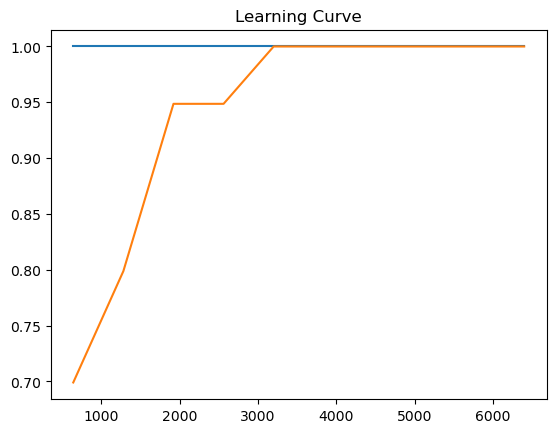

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.plot(train_sizes, train_scores.mean(1), label='Training score')
plt.plot(train_sizes, test_scores.mean(1), label='Cross-validation score')
plt.show()

In [22]:
# Evaluasi model yang SVM
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Akurasi Model: 1.0

Classification Report:
                     precision    recall  f1-score   support

Alcoholic Beverages       1.00      1.00      1.00       402
             Juices       1.00      1.00      1.00       380
        Soft Drinks       1.00      1.00      1.00       412
              Water       1.00      1.00      1.00       406

           accuracy                           1.00      1600
          macro avg       1.00      1.00      1.00      1600
       weighted avg       1.00      1.00      1.00      1600


Confusion Matrix:
[[402   0   0   0]
 [  0 380   0   0]
 [  0   0 412   0]
 [  0   0   0 406]]

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Berdasarkan hasil ini, beberapa kelemahan potensial model:

1. Overfitting Indikasi
- Akurasi 100% di semua metode
- Cross-validation selalu 1.0
- Tidak ada variasi kesalahan prediksi

2. Kemungkinan Penyebab:
- Dataset terlalu kecil/sederhana
- Fitur sangat mudah diprediksi
- Mungkin ada data leakage

3. Rekomendasi Investigasi Lanjut:
- Periksa korelasi antar fitur
- Tambah variasi data
- Kurangi fitur yang terlalu informatif
- Pertimbangkan:
  * Fitur Cluster
  * Total_Price_Bin
  * Price_Bin_Encoded

4. Strategi Perbaikan:
- Kumpulkan data lebih banyak
- Tambah kompleksitas fitur
- Gunakan teknik sampling
- Eksperimen dengan parameter model
